# Hoja de Trabajo 8
## Redes Neuronales
---
**Integrantes**
- Maria Marta Ramirez Gil
- Gustavo Andres Gonzalez Pineda 
- Diego Alberto Leiva Pérez 
---

## Análisis Exploratorio

### Comprensión Inicial

**Importar Librerias**

In [1]:
# Analisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento de datos.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Librerias de Redes Neuronales
from keras import Sequential
from keras import layers
from keras import callbacks

# Métricas de Validación
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix

**Cargar los Dataset**

In [2]:
# Cargar los datos
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

**Información general del dataset**

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

**Estructura del dataset**

In [5]:
print(f"El dataset de entreno contiente: {df_train.shape[0]} observaciones y {df_train.shape[1]} variables")
print(f"El dataset de test contiente: {df_test.shape[0]} observaciones y {df_test.shape[1]} variables")

El dataset de entreno contiente: 1460 observaciones y 81 variables
El dataset de test contiente: 1459 observaciones y 80 variables


In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### Identificación de Variables

Se descarta el dataset de Test ya que no contiene la variable objetivo por lo que no es posible realizar predicciones sobre esa data y evaluar el resultado.

**Variables categóricas**

In [8]:
# Encontrar variables categoricas en el dataset de entreno
categorical = df_train.select_dtypes(include=['object']).columns.tolist()

print(f"Hay {len(categorical)} variables categoricas en el dataset:")
for column in categorical:
    print(f"- {column}")


# Contar las variables categoricas binarias en el dataset de entreno
binary_categorical = [col for col in categorical if df_train[col].nunique() == 2]

print(f"\nHay {len(binary_categorical)} variables categoricas binarias en el dataset de :")
for column in binary_categorical:
    print(f"- {column}")

Hay 43 variables categoricas en el dataset:
- MSZoning
- Street
- Alley
- LotShape
- LandContour
- Utilities
- LotConfig
- LandSlope
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- ExterQual
- ExterCond
- Foundation
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- Heating
- HeatingQC
- CentralAir
- Electrical
- KitchenQual
- Functional
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- PavedDrive
- PoolQC
- Fence
- MiscFeature
- SaleType
- SaleCondition

Hay 4 variables categoricas binarias en el dataset de :
- Street
- Alley
- Utilities
- CentralAir


**Frecuencia de valores categóricos**

In [9]:
# Contar las variables categoricas en el dataset de entreno
for column in categorical:
    print(df_train[column].value_counts())
    print('\n', '-'*35, '\n')

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

 ----------------------------------- 

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

 ----------------------------------- 

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

 ----------------------------------- 

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

 ----------------------------------- 

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

 ----------------------------------- 

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

 ----------------------------------- 

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

 ----------------------------------- 

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

 ----------------------------------- 

Neighborhood
NAmes      225
Collg

**Variables numéricas**

In [10]:
# Encontrar variables numericas en el dataset de entreno
numerical = df_train.select_dtypes(exclude=['object']).columns.tolist()

print(f"Hay {len(categorical)} variables numericas en el dataset:")
for column in numerical:
    print(f"- {column}")

Hay 43 variables numericas en el dataset:
- Id
- MSSubClass
- LotFrontage
- LotArea
- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageYrBlt
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- MoSold
- YrSold
- SalePrice


----
### Preprocesamiento y Limpieza de datos

#### Verificación y manejo de valores Nulos o faltantes

In [11]:
# Calcular el porcentaje de valores nulos para cada tipo
null_percentage_categorical = df_train[categorical].isnull().mean() * 100
null_percentage_numeric = df_train[numerical].isnull().mean() * 100

print(f"Porcentaje de data faltante en variables categoricas:")
print( null_percentage_categorical.sort_values(ascending=False))
print('\n', '-'*35, '\n')
print(f"Porcentaje de data faltante en variables numericas:")
print(null_percentage_numeric.sort_values(ascending=False))

Porcentaje de data faltante en variables categoricas:
PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
GarageType        5.547945
GarageCond        5.547945
GarageQual        5.547945
GarageFinish      5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtQual          2.534247
BsmtCond          2.534247
Electrical        0.068493
KitchenQual       0.000000
CentralAir        0.000000
Functional        0.000000
HeatingQC         0.000000
Heating           0.000000
PavedDrive        0.000000
SaleType          0.000000
MSZoning          0.000000
Street            0.000000
Condition2        0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
BldgType          0.000000
Foundation        0.000000
H

**Visualizar la data faltante**

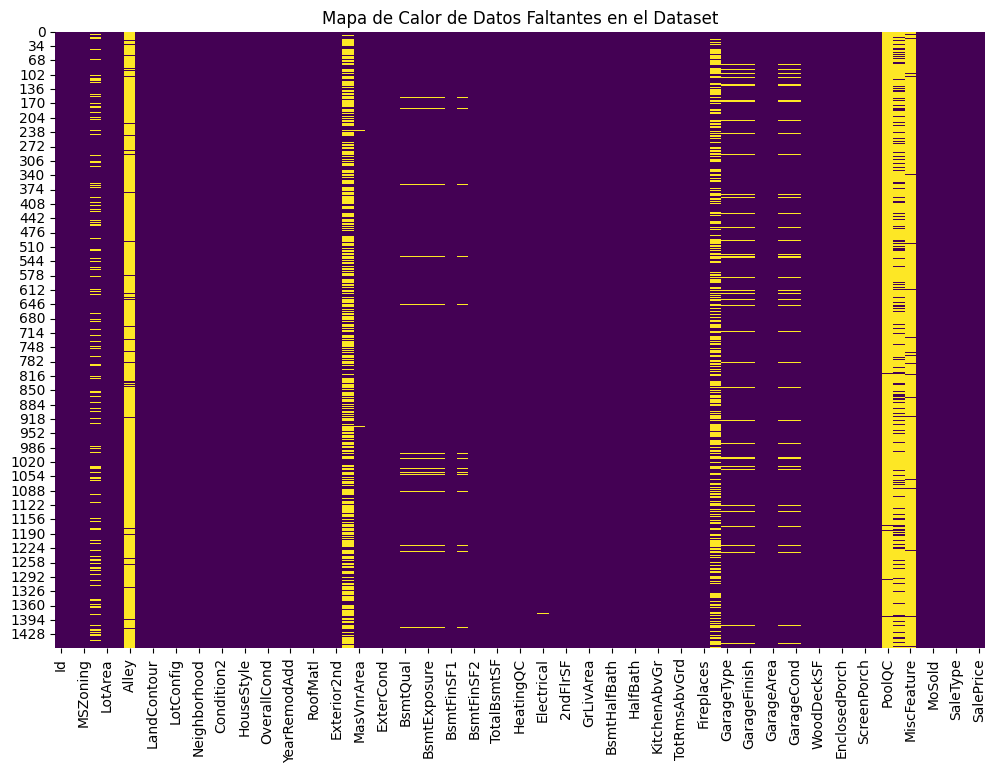

In [12]:
# Crear un mapa de calor para visualizar los datos faltante
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes en el Dataset')
plt.show()

Es posible observar que hay columnas que tienen una mayor cantidad de valores faltantes, `PoolQC`, `MiscFeature`, `Fireplaces`, `Exterior2nd`, `Alley` y `MSZoning`.

Con un porcentaje mayor al 50% de los datos.

**Evaluación de impacto de eliminación de nulos**

In [13]:
data_copy = df_train.copy()

# Eliminar filas con cualquier valor nulo
data_raw_clean = data_copy.dropna()

# Verificar cuántos registros quedan después de eliminar los nulos
remaining_records = data_raw_clean.shape[0]
remaining_records_percentage = (remaining_records / data_copy.shape[0]) * 100

print(f"Si se eliminacen todas las observaciones con valores nulos, \
      \nquedarian {remaining_records} registros, \
      \n{remaining_records_percentage:.2f}% de la data original de entreno")

Si se eliminacen todas las observaciones con valores nulos,       
quedarian 0 registros,       
0.00% de la data original de entreno


Esta claro que eliminar todos los registros nulos tiene un gran impacto sobre el dataset, dejando apenas un 0% de los datos originales, en consecuencia, se ha determinado que esta no es una acción viable para el análisis.

La accion viable sera eliminar las columnas con alto porcentaje de valores faltanes e imputar valores de media o moda a las columnas con menos del 5% de valores faltantes.

In [14]:
# Eliminar las variables con gran cantidad de nulos o que no aportan información
df_train.drop(['Id',
           'PoolQC',
           'MiscFeature',
           'Alley', 
           'Fence',
           'MasVnrType',
           'FireplaceQu'], axis=1, inplace=True)

# Crear una copia de los datos
data = df_train.copy()

**Evaluación de correlación entre variables numéricas**

La variable objetivo sera la variable `SalePrice`, que servira para predecir el precio de venta de una casa.

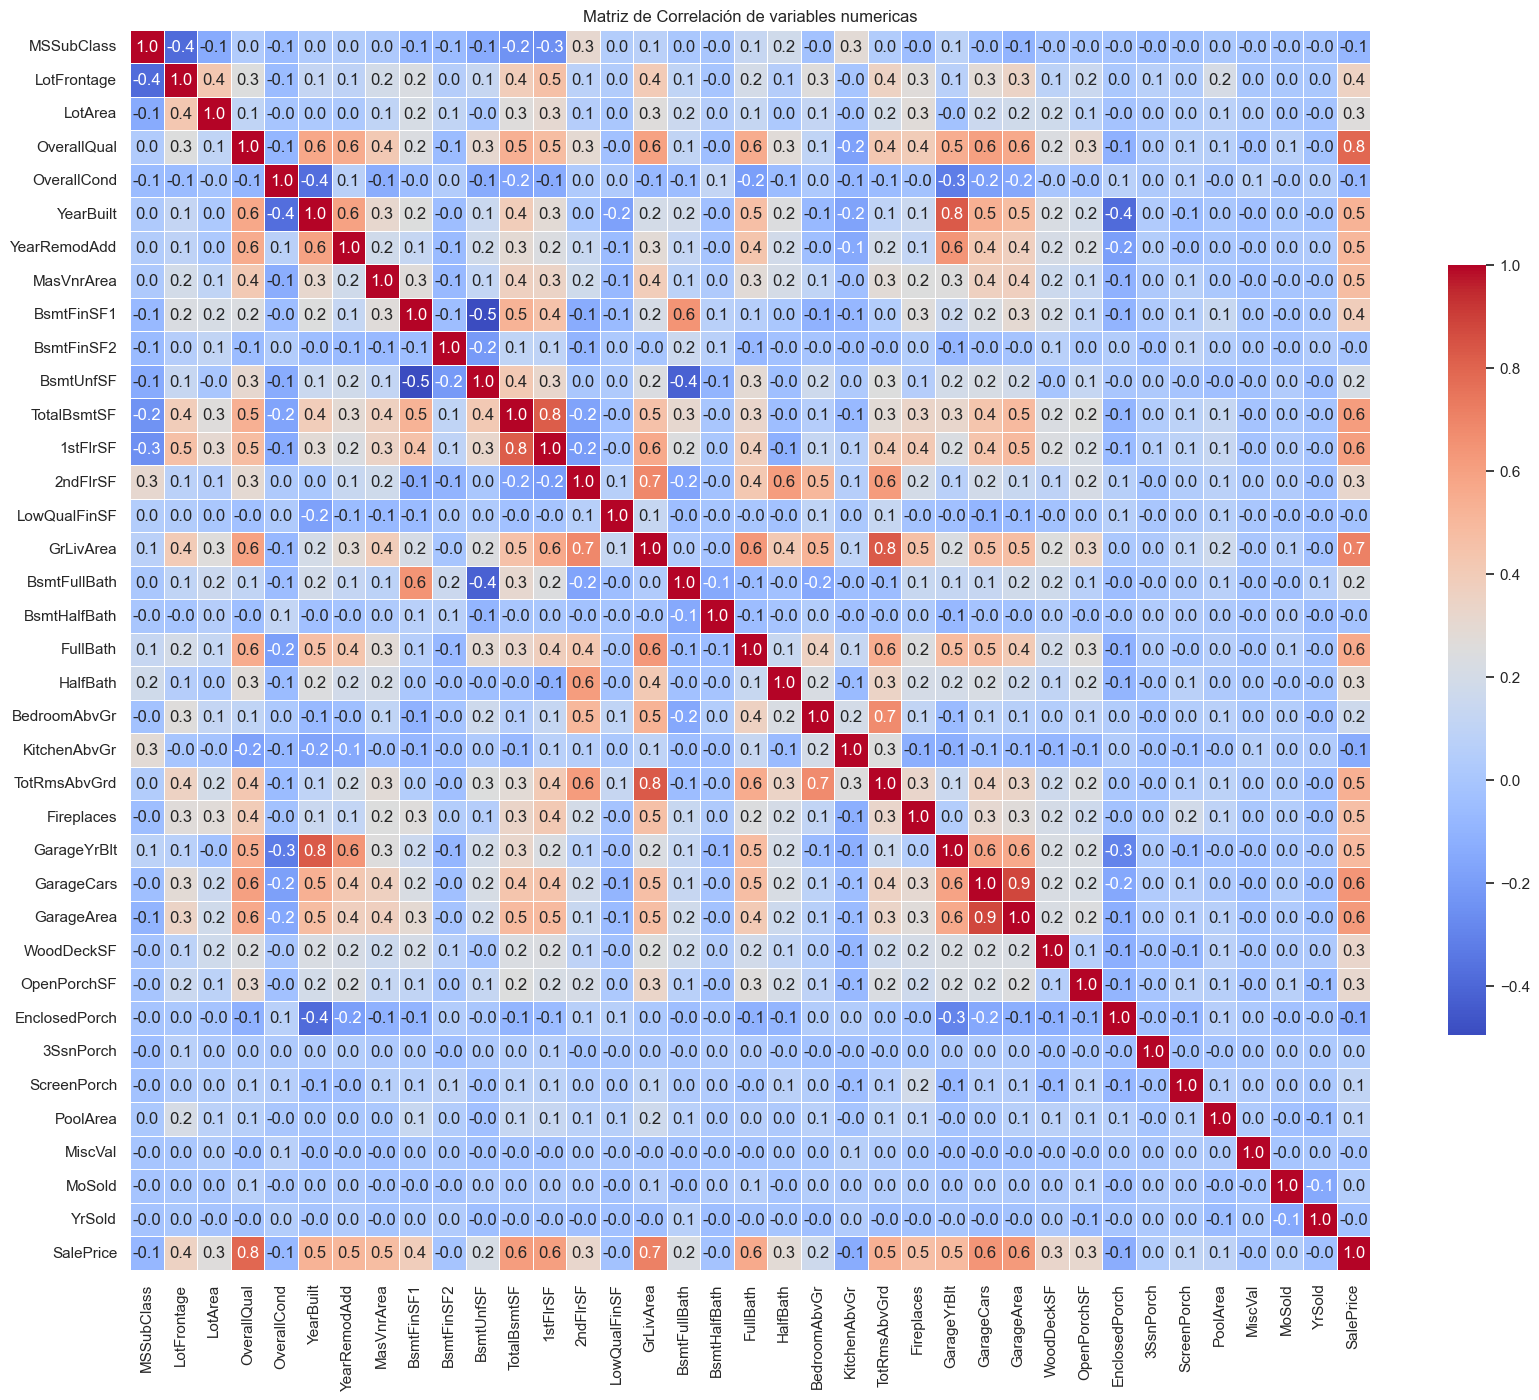

In [15]:
# Se evalua la correlacion entre las variables numericas para determinar si se pueden eliminar algunas de ellas
numerical = df_train.select_dtypes(exclude=['object']).columns.tolist()

# Calcular la correlación entre las variables numéricas
correlation_matrix = df_train[numerical].corr()

# Configurar el estilo de los gráficos
sns.set_theme(style="white")

# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matriz de Correlación de variables numericas')
plt.show()

**Imputación de valores**

In [16]:
numerical = data.select_dtypes(exclude=['object']).columns.tolist()
categorical = data.select_dtypes(include=['object']).columns.tolist()

# Imputar con la moda para variables categóricas con 10% o menos de valores faltantes
for column in categorical:
    mode = data[column].mode()[0]
    data.fillna({column: mode}, inplace=True)

# Imputar con la mediana para variables numéricas con 10% o menos de valores faltantes
for column in numerical:
    median = data[column].median()
    data.fillna({column: median}, inplace=True)

In [17]:
# Verificar que ya no hay valores nulos
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

### Transformacion
Para lograr nuestro objetivo de clasificar las casas en categorías de precios bajos, medios y altos, hemos introducido una nueva columna que simplifica este proceso. Hemos definido nuestras categorías de precios como baratos, medios y altos, basados en criterios propios.

In [18]:
def categorize_price(price):
    """
    Categorizes the given price into one of three categories based on the following criteria:
    - If the price is less than 150,000, it is categorized as 0 (Cheap).
    - If the price is between 150,000 and 300,000, it is categorized as 1 (Normal).
    - If the price is greater than or equal to 300,000, it is categorized as 2 (Expensive).

    Parameters:
    price (float): The price to be categorized.

    Returns:
    int: The category of the price.
    """
    if price < 150000:
        return 0
    elif price < 300000:
        return 1
    else:
        return 2

# Aplicar la función para crear la nueva columna
data['PriceCategory'] = data['SalePrice'].apply(categorize_price)

In [19]:
# Verificar la creacion de la columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [20]:
print(f"Valores únicos de la columna PriceCategory:")
for value in data['PriceCategory'].unique():
    print(value)

Valores únicos de la columna PriceCategory:
1
0
2


**Enconding**

Dado que existen variables categorícas es necesario codificarlas para que el modelo pueda comprenderlas

In [21]:
# Inicializar el codificador
label_encoder = LabelEncoder()

# Aplicar el label encoding a las variables categóricas
for column in categorical:
    data[column] = label_encoder.fit_transform(data[column])

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PriceCategory
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,2,2008,8,4,208500,1
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,5,2007,8,4,181500,1
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,9,2008,8,4,223500,1
3,70,3,60.0,9550,1,0,3,0,0,0,...,0,0,0,0,2,2006,8,0,140000,0
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,12,2008,8,4,250000,1


## Redes Neuronales Artificiales

### Funciones para Modelado

**Seleccionar la variable objetivo**

In [22]:
def select_feature(data, feature):
    """
    Selects the feature and the target variable from the given data.

    Parameters:
    data (DataFrame): The data from which the feature and target variable are to be selected.
    feature (str): The name of the feature to be selected.

    Returns:
    DataFrame, Series: The feature and the target variable.
    """
    x = data.drop(feature, axis=1)
    y = data[feature]
    
    print(f"La forma de x es: {x.shape}")
    print(f"La forma de y es: {y.shape}")

    x = np.array(x)
    y = np.array(y)
    return x, y

**Dividir el dataset en entrenamiento y prueba**

In [23]:
def gen_split(x, y, test_size=0.2):
    """
    Generates a train-test split of the given data.

    Parameters:
    x (numpy.ndarray): The input features.
    y (numpy.ndarray): The target variable.
    test_size (float): The proportion of the dataset to include in the test split.

    Returns:
    numpy.ndarray: The input features for the training set.
    numpy.ndarray: The input features for the test set.
    numpy.ndarray: The target variable for the training set.
    numpy.ndarray: The target variable for the test set.
    """
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=123)
    return X_train, X_test, y_train, y_test

**Escalar la Data**

In [24]:
def scale_data(x_train, x_test):
    """
    Scales the input features using MinMaxScaler.

    Returns:
    numpy.ndarray: The scaled input features.
    """
    min_max_scaler = MinMaxScaler()
    X_train = min_max_scaler.fit_transform(x_train)
    X_test = min_max_scaler.transform(x_test)
    return X_train, X_test

**Construccion del Modelo de Red Neuronal Artificial**

In [25]:
def gen_model(units, input_shape, activation=['relu','linear'], output_neurons=1):
    """
    Generates a Sequential model with the given number of units and input shape.

    Parameters:
    units (dict): The dictionary containing the number of units for each layer.
    input_shape (int): The shape of the input data.

    Returns:
    keras.Sequential: The generated model.
    """
    model = Sequential() # Construccion de red simple
    model.add(layers.Input(shape=(input_shape.shape[1],)))
    for key, value in units.items():
        model.add(layers.Dense(value, activation=activation[0]))
    model.add(layers.Dense(output_neurons, activation=activation[1]))
    model.summary()
    return model

**Compilar el Modelo**

In [26]:
def compile_model(model, x_train, y_train, x_test, y_test):
    """
    Compiles the given model using the Adam optimizer and Mean Squared Error loss function.

    Parameters:
    model (keras.Sequential): The model to be compiled.

    Returns:ssss
    keras.Sequential: The compiled model.
    """
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    es = callbacks.EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)
    
    history = model.fit(x_train, y_train,
                    validation_data = (x_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)
    return history

**Resultados**

In [27]:
def plot_loss(history):
    """
    Plots the training and validation loss.

    Parameters:
    history (keras.callbacks.History): The history object containing the loss values.

    Returns:
        None
    """
    historu_dict = history.history
    loss_values = historu_dict['loss']
    val_loss_values = historu_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [28]:
def plot_performance(x_train, y_train, x_test, y_test, model):
    """
    Plots the actual vs predicted values for training and validation datasets.

    Parameters:
    - x_train: numpy array or pandas DataFrame, input features for training dataset.
    - y_train: numpy array or pandas Series, target variable for training dataset.
    - x_test: numpy array or pandas DataFrame, input features for validation dataset.
    - y_test: numpy array or pandas Series, target variable for validation dataset.

    Returns:
    None
    """
    fig, axes = plt.subplots(1,2) # 1 fila, dos columnas

    # Entrenamiento
    axes[0].scatter(x=y_train, y=model.predict(x_train)) #first row, first entry (left top)
    axes[0].set_xlabel("Actual", fontsize=10)
    axes[0].set_ylabel("Predicted",  fontsize=10)
    axes[0].set_title("Training")
    # Linea de 45 grados
    x = np.linspace(*axes[0].get_xlim())
    axes[0].plot(x, x, color='red')
    # Validacion
    axes[1].scatter(x=y_test, y=model.predict(x_test)) # first row, second entry (right top)
    axes[1].set_xlabel("Actual", fontsize=10)
    axes[1].set_ylabel("Predicted",  fontsize=10)
    axes[1].set_title("Validation")
    # Linea de 45 grados
    x = np.linspace(*axes[1].get_xlim())
    axes[1].plot(x, x, color='red')
    # Pequeña separación entre gráficas.
    fig.tight_layout()

**Predicciones**

In [29]:
def get_predictions(x_test, model):
    """
    Predicts the target variable using the given input features.

    Parameters:
    x_test (numpy.ndarray): The input features for which the target variable is to be predicted.

    Returns:
    numpy.ndarray: The predicted target variable.
    """
    pred = model.predict(x_test)
    print(pred)
    return pred

**Metricas**

In [30]:
def get_metrics(y, predictions):
    """
    Calculates the Mean Absolute Error, Mean Squared Error, and R2 Score for the given data.

    Parameters:
    x (numpy.ndarray): The input features.
    y (numpy.ndarray): The actual target variable.
    predictions (numpy.ndarray): The predicted target variable.

    Returns:
    float, float, float: The Mean Absolute Error, Mean Squared Error, and R2 Score.
    """
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    return mae, mse, r2

In [31]:
def compare_metrics(mae1, mse1, r21, mae2, mse2, r22):
    """
    Compare the metrics of two models.

    Parameters:
    mae1 (float): The Mean Absolute Error of the first model.
    mse1 (float): The Mean Squared Error of the first model.
    r21 (float): The R2 Score of the first model.
    mae2 (float): The Mean Absolute Error of the second model.
    mse2 (float): The Mean Squared Error of the second model.
    r22 (float): The R2 Score of the second model.

    Returns:
    None
    """
    print(f"Model 1 Metrics:")
    print(f"Mean Absolute Error: {mae1}")
    print(f"Mean Squared Error: {mse1}")
    print(f"R2 Score: {r21}")
    print('\n', '-'*35, '\n')
    print(f"Model 2 Metrics:")
    print(f"Mean Absolute Error: {mae2}")
    print(f"Mean Squared Error: {mse2}")
    print(f"R2 Score: {r22}")

In [32]:
def plot_confusion_matrix(y_test, predictions):
    """
    Plots the confusion matrix for the given data.

    Parameters:
    y_test (numpy.ndarray): The actual target variable.
    predictions (numpy.ndarray): The predicted target variable.

    Returns:
    None
    """
    # Convert continuous predictions to categorical
    rounded_predictions = np.round(predictions)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, rounded_predictions)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

### Modelos con `PriceCategory` como variable objetivo

In [33]:
# Seleccionar la variable objetivo
X, y = select_feature(data, 'PriceCategory')

# Dividir los datos en entrenamiento y prueba
X1_train, X1_test, y1_train, y1_test = gen_split(X, y, test_size=0.2)
X2_train, X2_test, y2_train, y2_test = gen_split(X, y, test_size=0.2)

# Escalar los datos
X1_train, X1_test = scale_data(X1_train, X1_test)
X2_train, X2_test = scale_data(X2_train, X2_test)

# Crear el modelo 1 con mas neuronas por capa y menos capas
units1 = {1:1000, 2:500, 3:250}
activations1 = ['relu', 'linear']
model1 = gen_model(units1, X1_train, activations1, output_neurons=1)

# Crear el modelo 2 con mas capas y menos neuronas por capa
units2 = {1:256, 2:128, 3:64, 4:32, 5:16, 6:8}
activations2 = ['sigmoid', 'softmax']
model2 = gen_model(units2, X2_train, activations2, output_neurons=1)

# Compilar el modelo
history1 = compile_model(model1, X1_train, y1_train, X1_test, y1_test)
history2 = compile_model(model2, X2_train, y2_train, X2_test, y2_test)

La forma de x es: (1460, 74)
La forma de y es: (1460,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │        75,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701,001 (2.67 MB)

 Trainable params: 701,001 (2.67 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,105 (246.50 KB)

 Trainable params: 63,105 (246.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5961 - mae: 0.8404 - val_loss: 0.2040 - val_mae: 0.3902
Epoch 2/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1609 - mae: 0.3255 - val_loss: 0.1628 - val_mae: 0.3407
Epoch 3/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1787 - mae: 0.3325 - val_loss: 0.1861 - val_mae: 0.3509
Epoch 4/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1768 - mae: 0.3110 - val_loss: 0.1113 - val_mae: 0.2508
Epoch 5/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1379 - mae: 0.2793 - val_loss: 0.0876 - val_mae: 0.2223
Epoch 6/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1311 - mae: 0.2664 - val_loss: 0.1433 - val_mae: 0.2927
Epoch 7/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1363 - mae: 0.2732 - val_loss: 0.1940 - val_mae: 0.3559
Epoch 8/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1504 - mae: 0.2828 - val_loss: 0.0739 - val_mae: 0.2020
Epoch 9/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

c:\Users\diego\Documents\UVG\7mo Semestre\Mineria de Datos\HT8_Mineria\venv\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5129 - mae: 0.5129 - val_loss: 0.5068 - val_mae: 0.5068
Epoch 2/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5247 - mae: 0.5247 - val_loss: 0.5068 - val_mae: 0.5068
Epoch 3/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4797 - mae: 0.4797 - val_loss: 0.5068 - val_mae: 0.5068
Epoch 4/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5147 - mae: 0.5147 - val_loss: 0.5068 - val_mae: 0.5068
Epoch 5/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5101 - mae: 0.5101 - val_loss: 0.5068 - val_mae: 0.5068
Epoch 6/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4978 - mae: 0.4978 - val_loss: 0.5068 - val_mae: 0.5068
Epoch 7/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4758 - mae: 0.4758 - val_loss: 0.5068 - val_mae: 0.5068
Epoch 8/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5053 - mae: 0.5053 - val_loss: 0.5068 - val_mae: 0.5068
Epoch 9/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4722 - 

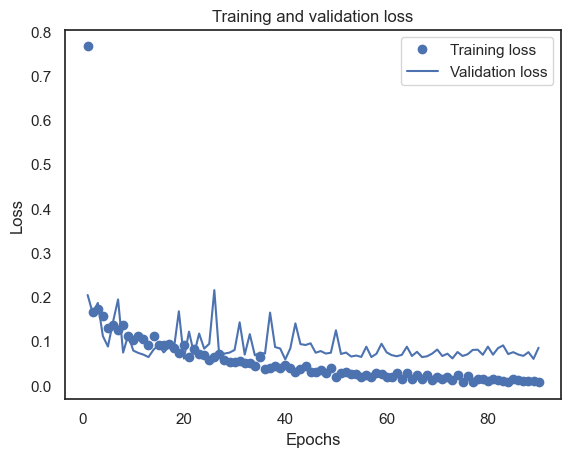

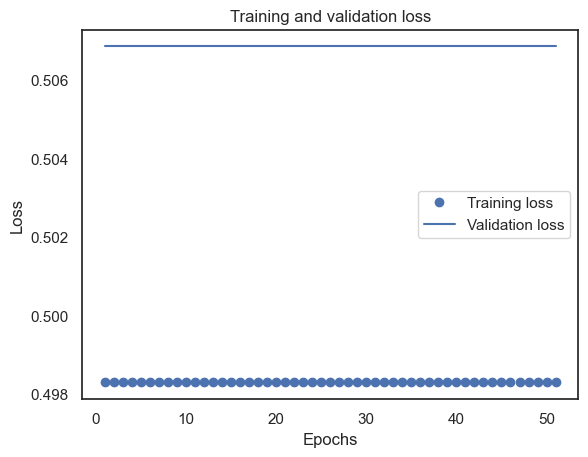

In [34]:
# Graficar la perdida
plot_loss(history1)
plot_loss(history2)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step


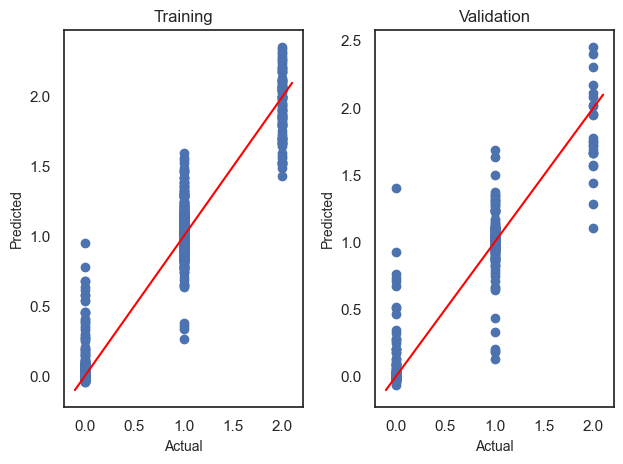

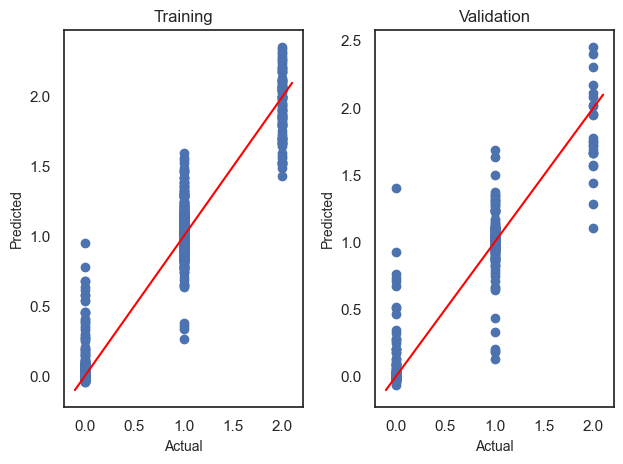

In [35]:
# Graficar el rendimiento
plot_performance(X1_train, y1_train, X1_test, y1_test, model1)
plot_performance(X1_train, y1_train, X1_test, y1_test, model1)

In [36]:
# Obtener las predicciones
predictions1 = get_predictions(X1_test, model1)
predictions2 = get_predictions(X2_test, model2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step
[[ 1.0478404e+00]
 [ 8.1092022e-02]
 [ 1.8320739e-02]
 [ 1.3165135e+00]
 [ 2.0426577e-01]
 [ 1.2786052e+00]
 [ 1.6682715e+00]
 [-4.1223951e-02]
 [ 3.3373058e-01]
 [ 1.4211904e-02]
 [ 7.6930219e-01]
 [ 1.2327514e+00]
 [ 1.7863421e-01]
 [-1.5070021e-02]
 [ 1.3560246e+00]
 [ 8.2436788e-01]
 [-5.5900775e-03]
 [ 1.9529489e+00]
 [ 1.0212368e+00]
 [ 9.6183133e-01]
 [ 8.8246995e-01]
 [ 9.9029404e-01]
 [ 1.4765173e-02]
 [ 1.3060409e-01]
 [ 1.0462725e+00]
 [ 7.3215330e-01]
 [ 1.0408343e+00]
 [ 9.5995748e-01]
 [ 2.0787213e-02]
 [-3.2195151e-03]
 [ 4.6316189e-01]
 [ 1.0570952e+00]
 [ 3.4863955e-01]
 [ 1.0219220e+00]
 [ 1.6625127e+00]
 [ 1.0661570e+00]
 [ 8.9956886e-01]
 [ 1.7736597e+00]
 [ 9.7424746e-01]
 [ 1.5382737e-02]
 [ 5.1297522e-01]
 [ 1.1159489e+00]
 [ 8.5888767e-01]
 [ 1.1018353e+00]
 [ 1.0308049e+00]
 [ 3.7686165e-02]
 [ 2.0208001e+00]
 [ 9.9192953e-01]
 [ 1.1338376e+00]
 [ 1.4731772e-03]
 [ 1.1066059e+00]
 [ 9.5135105e-01]
 [ 2.0456894e-01]
 [ 7.

c:\Users\diego\Documents\UVG\7mo Semestre\Mineria de Datos\HT8_Mineria\venv\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [37]:
# Obtener las métricas
mae1, mse1, r21 = get_metrics(y1_test, predictions1)
mae2, mse2, r22 = get_metrics(y2_test, predictions2)

In [38]:
# Comparar las métricas
compare_metrics(mae1, mse1, r21, mae2, mse2, r22)

Model 1 Metrics:
Mean Absolute Error: 0.13549887693219193
Mean Squared Error: 0.05846033019809172
R2 Score: 0.8499349231090411

 ----------------------------------- 

Model 2 Metrics:
Mean Absolute Error: 0.5068493150684932
Mean Squared Error: 0.5068493150684932
R2 Score: -0.3010597302504816


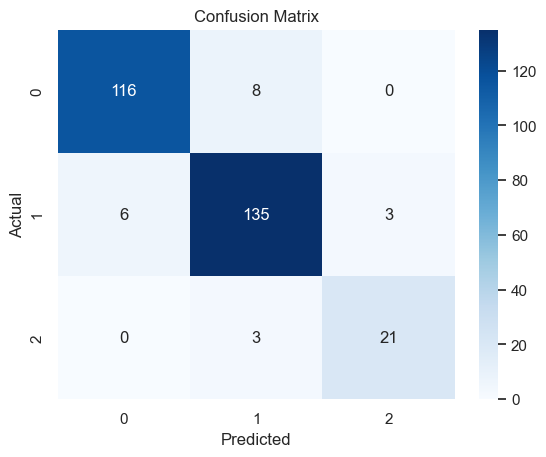

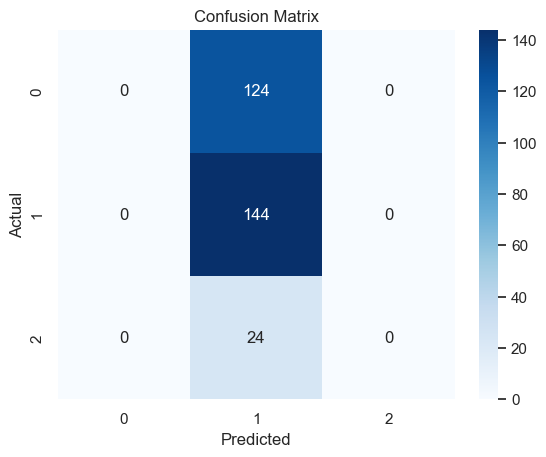

In [39]:
# Graficar la matriz de confusión
plot_confusion_matrix(y1_test, predictions1)
plot_confusion_matrix(y2_test, predictions2)